## CHECKING ANOVA ASSUMPTIONS

So far, we have recorded a set of dataset including the accuracies obtained after each model generation. Since our experimental design is multi-factored, we propose ANOVA technique as a way to interpret our results.

However, before to perform ANOVA analysis we need to check that our experimental results hold the following assumptions required by this statistical model: 

1. Observations are indepenent.
2. Observations are real numbers.
3. Each sample series comes from a Normally distributed population.
4. All the sample series have equal variances.

The first two requirements can be deducted from the way we collected the data. The last two, will require some statiscticala analysis before we can proceed with ANOVA.

In [6]:
import os
import pandas as pd
import math

alpha = 0.05

PATHS = {
    'MEL_1D': '../data/processed/results/MEL/1D',
    'CQT_1D': '../data/processed/results/QT/1D',
    'MEL_2D': '../data/processed/results/MEL/2D',
    'CQT_2D': '../data/processed/results/QT/2D'
}

ROWS = {key:[] for key in list(PATHS.keys())}

for key in PATHS:
    path = PATHS[key]
    for result in os.listdir(path):
        df = pd.read_csv(os.path.join(path, result))
        ROWS[key].append(df['acc'][0])

DATA = pd.DataFrame(ROWS)

display(DATA.head())


,MEL_1D,CQT_1D,MEL_2D,CQT_2D
0,0.646667,0.476667,0.770000,0.650000
1,0.630000,0.506667,0.730000,0.693333
2,0.646667,0.483333,0.773333,0.720000
3,0.666667,0.546667,0.793333,0.706667
4,0.613333,0.490000,0.810000,0.703333


## CHECK ANOVA ASSUMPTIONS

### Normality

Histograms


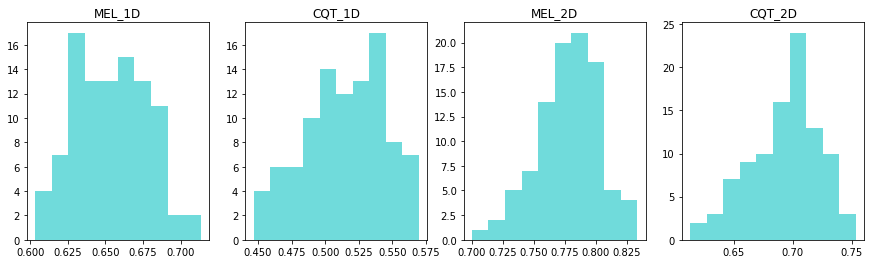

In [7]:
import matplotlib.pyplot as plt

print("Histograms")

fig, axes = plt.subplots(1, len(ROWS.keys()))

fig.set_figwidth(15)

for index, key in enumerate(list(ROWS.keys())):
    axes[index].hist(DATA[key], color='#70DBDB')
    axes[index].set_title(key)

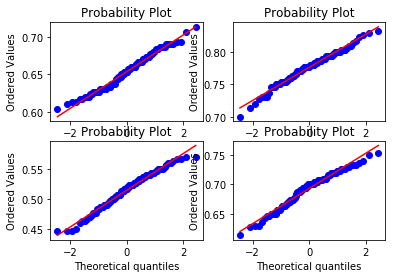

In [20]:
import scipy.stats as stats

ax1 = plt.subplot(221)
res = stats.probplot(ROWS['MEL_1D'], plot=plt)

ax2 = plt.subplot(222)
res = stats.probplot(ROWS['MEL_2D'], plot=plt)

ax3 = plt.subplot(223)
res = stats.probplot(ROWS['CQT_1D'], plot=plt)

ax4 = plt.subplot(224)
res = stats.probplot(ROWS['CQT_2D'], plot=plt)


Histograms reflects normality in the data. And the QQ-plots show that all our data points lie closely to the normality line, so we can assume normality in our data.

### Homocedasticity: equal variances

So far, we have evidence of normality in the populations for each series of samples, therefore, we will contrast the equallity of their variances using a Bartlett's test, which estabilsh the following hypothesis:

1. All populations have the same variance
2. Some of the populations differ in variance.

In [10]:
from scipy.stats import bartlett

stat, p = bartlett(DATA['CQT_2D'], DATA['CQT_1D'], DATA['MEL_1D'], DATA['MEL_2D'])

if p > alpha:
    print("All populations present the same variance (fail to reject H0)")
else:
    print("Some population differs in their variance (reject H0)")

All populations present the same variance (fail to reject H0)


At this point, we have collected enough evidence to proceed with the ANOVA analysis